# Module Three Final Project

For: Amazon Inc.

By: Jonathan E Ericksen, JE Consulting

## Background
> Amazon, with it's busy agenda and lackluster talent inside their data science teams, has decided to contract externally with JE Consulting to help develop a classification model. The intent for this model is to predict a shoppers propensity to make a purchase during a shopping session using real time user analytics. Amazon intends to use this model to determine when to offer last minute discounts on products within their in an attempt to entice shoppers who are not exhibiting characteristics of purchasing products to reverse course and make a purchase. 

## Objective:
> The objective for JE Consultants is to fit the best model possible with the provided data. The resulting model will in turn be nested in the backend of Amazon's ecommerce site and used to make decisions on whether or not to trigger pre-constructed promotions for differing products. Should the model determine a current shopper is showing no propensity of making a purchase, Amazon will trigger a promotional offering to entice a transaction.

> Further, Amazon Inc. has asked JE Consulting to produce a cost/benefit analysis with adjustable monetary parameters which calculates the net effect of the resulting models prediction on the provided training set.

## Question:
> Is the implementation of a machine learning classifier which predicts a shoppers propensity to transact during a shopping session advantageous with respect to revenue maximization? 

## Methodology:

> This project loosely follows the industry standard OSEMiN process. The 5 stages in OSEMiN are outlined in the table of contents below with each stage highlighted within the ensuing notebook.

## Table of Contents:<a id='top'></a>
> #### [Obtain](#obtain): 
- Sourcing the data
- Importing data

> #### [Explore](#explore): 
- Data preprocessing, cleaning & wrangling
- Predictive feature visuals
- Data set balance analysis

> #### [Condition](#condition):
- Addressing collinearity
- Feature scaling
- Target and feature separation

> #### [Model](#model):
- Initial Model
- Initial Model Interpretation & Notes
- Data Rebalancing
- Feature engineering
- Hyperparameter tuning
- Initial Cost Benefit analysis
- Model iterations
- Final model

> *(non-OSEMiN additions)*
- **[Cost Benefit Analysis](#costbenefitanalysis)**
- **[Conclusions](#conclusion)**
    - Answer to our business question
- **[Recommendations](#recommendation)**
- **[Future Work](#futurework)**

------------------------------------------------------------------------------------------------------------------

Before we begin, let's import the necessary libraries for our project: 

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings; warnings.simplefilter('ignore')

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix, recall_score, precision_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import imblearn
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE

## Obtain <a id='obtain'></a>

[Back to top](#top)

The data used for this project comes from the UCI Machine Learning repository and be found here: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

Let's read the data from the CSV file into a pandas dataframe: 

In [60]:
df = pd.read_csv('OnlineShopperIntention.csv')

------------------------------------------------------------------------------------------------------------------
## Explatory Data Analysis <a id='explore'></a>

[Back to top](#top)

We'll begin our exploratory analysis by calling the standard descriptive methods on the data frame to familiarize ourselves with the features, five point statistics and data types:

In [61]:
display(df.head())
display(df.tail())
display(df.describe())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Let's look at the data types as well as sum of any null values that may exist: 

In [62]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

None

In [63]:
display(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Next, we'll separate out the categorical from the numerical features in the data set for further analysis: 

In [64]:
print('-' * 100)
num_attributes = df.select_dtypes(include=['int64', 'float64'])
print('There are {} numerical features:' .format(len(num_attributes.columns)))
print()
print(num_attributes.columns)
print('-' * 100)
cat_attributes = df.select_dtypes(include = ['object'])
print('{} categorical features:'.format(len(cat_attributes.columns)))
print()
print(cat_attributes.columns)
print('-' * 100)
bool_attributes = df.select_dtypes(include = ['bool'])
print('And {} boolean features (one of which is the target dimension):'.format(len(bool_attributes.columns)))
print()
print(bool_attributes.columns)

----------------------------------------------------------------------------------------------------
There are 14 numerical features:

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')
----------------------------------------------------------------------------------------------------
2 categorical features:

Index(['Month', 'VisitorType'], dtype='object')
----------------------------------------------------------------------------------------------------
And 2 boolean features (one of which is the target dimension):

Index(['Weekend', 'Revenue'], dtype='object')


We'll take a look at a histogram for each of the numerical features to get a sense of the scale of these features. We'll use this to determine whether or not we'll need to normalize the data: 

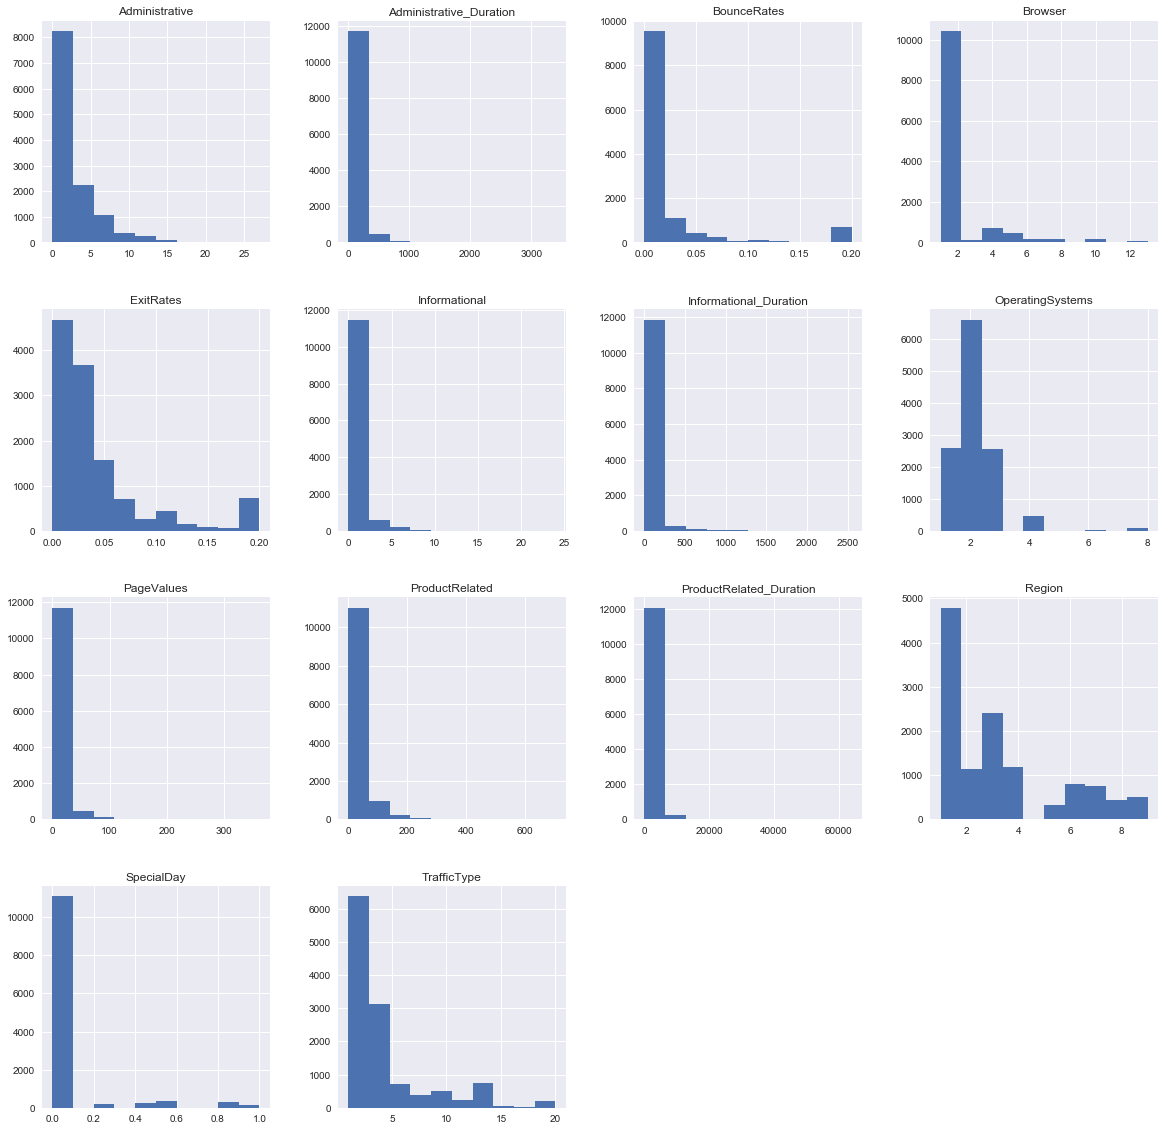

In [65]:
num_attributes.hist(figsize=(20,20))
plt.show()

Let's also take a look at a box plot of our numerical features to visualize outliers:

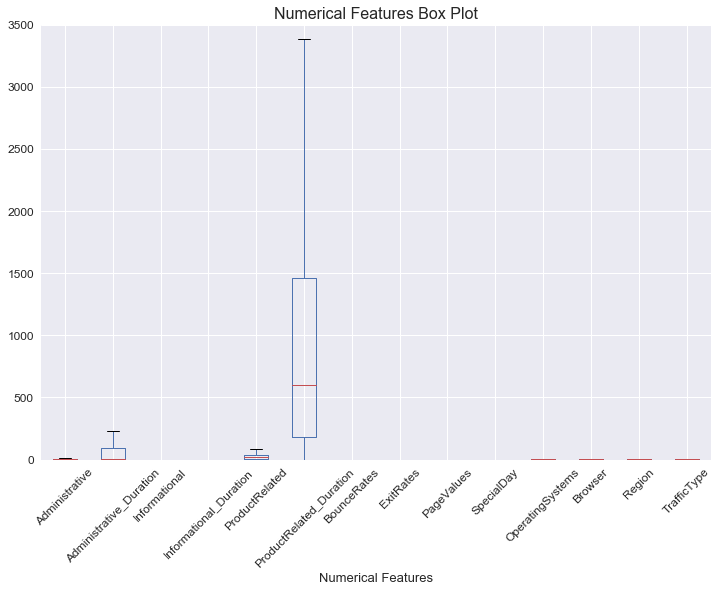

In [66]:
num_attributes.boxplot(figsize=(12,8), rot = 45)
plt.xlabel('Numerical Features', size = 13)
plt.title('Numerical Features Box Plot', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylim(0,3500);

Let's run the box plot once more after dropping the 'ProductRelated_Duration' feature as the feature's scale impacts the visual:

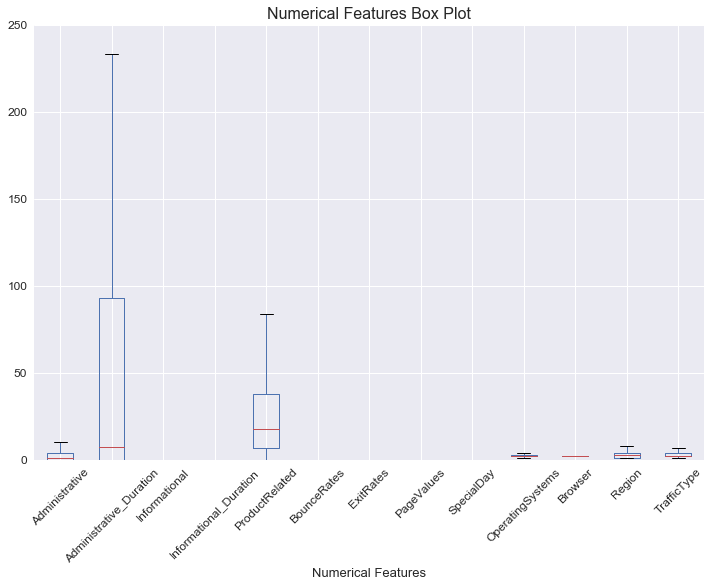

In [67]:
num_attributes.drop(columns = 'ProductRelated_Duration').boxplot(figsize=(12,8), rot = 45)
plt.xlabel('Numerical Features', size = 13)
plt.title('Numerical Features Box Plot', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylim(0,250);

Based on the significant variance in scale of the numerical data, we'll need to normalize these features. But first, let's further analyze the categorical variables: 

In [68]:
display(cat_attributes.head())
print('Unique visitor types: {}'.format(cat_attributes['VisitorType'].unique()))
print('\nUnique months: {}'.format(cat_attributes['Month'].unique()))

,Month,VisitorType
0,Feb,Returning_Visitor
1,Feb,Returning_Visitor
2,Feb,Returning_Visitor
3,Feb,Returning_Visitor
4,Feb,Returning_Visitor


Unique visitor types: ['Returning_Visitor' 'New_Visitor' 'Other']

Unique months: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


Let's look at the distribution of website visits for each of the categorical variables starting with Month: 

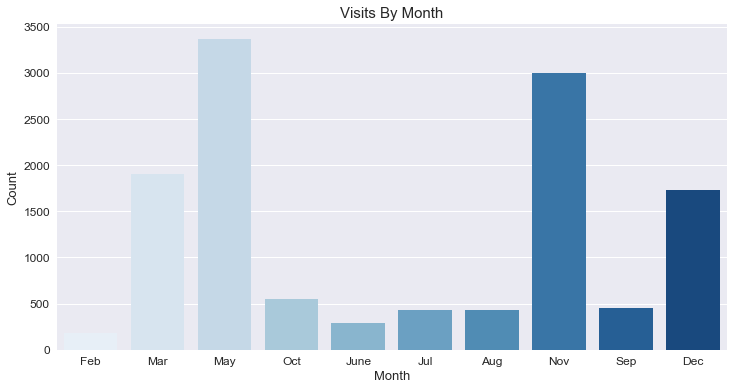

In [69]:
plt.figure(figsize=(12,6))
sns.countplot(cat_attributes['Month'], palette='Blues')
plt.title('Visits By Month', size = 15)
plt.xlabel('Month', size = 13)
plt.ylabel('Count', size = 13)
plt.xticks(size = 12)
plt.yticks(size = 12);

We'll look at purchases by month to see if there's any interesting purchasing behavior throughout the year:

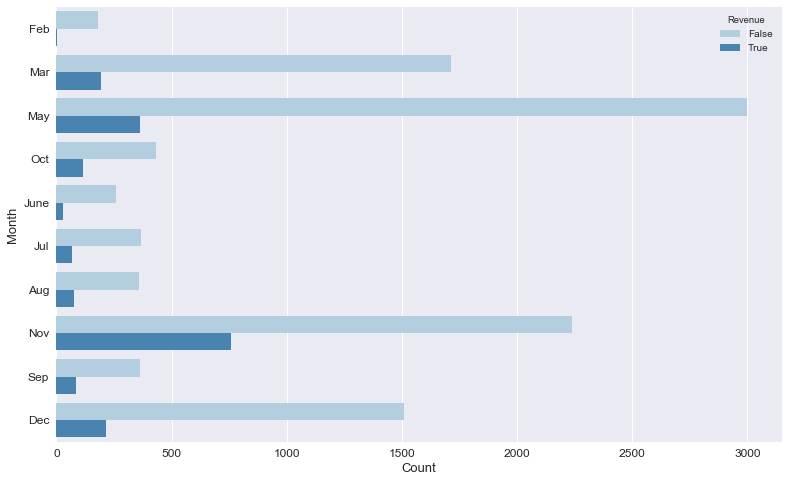

In [70]:
plt.figure(figsize=(13,8))
sns.countplot(y='Month', hue='Revenue', data = df, palette='Blues')
plt.xticks(size = 12)
plt.yticks(size = 12);
plt.xlabel('Count', size = 13)
plt.ylabel('Month', size = 13);

Let's take a look at the distribution of website traffic by visitor type:

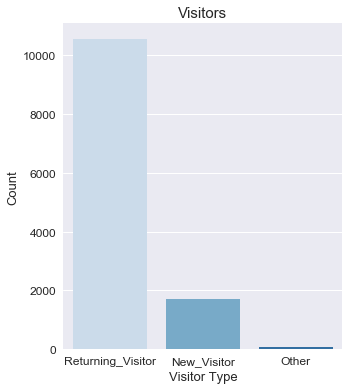

In [71]:
plt.figure(figsize=(5,6), )
sns.countplot(cat_attributes['VisitorType'],palette='Blues')
plt.title('Visitors', size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Visitor Type', size = 13)
plt.ylabel('Count', size = 13);

Now we'll look at the breakdown of visitor type and purchases made to see if there is any interesting purchase behavior between new and returning customers:

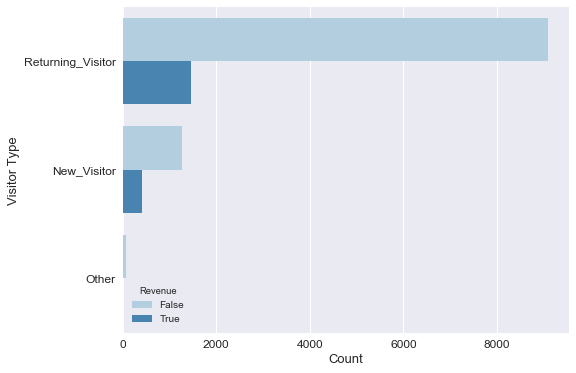

In [72]:
plt.figure(figsize=(8,6))
sns.countplot(y='VisitorType', hue='Revenue', data = df, palette='Blues')
plt.xticks(size = 12)
plt.yticks(size = 12);
plt.ylabel('Visitor Type', size = 13)
plt.xlabel('Count', size = 13);

During the conditioning phase, we'll dummify the categorical features within the data set. Before we get to that, let's take a quick look at a countplot of our target classes to determine if rebalancing the data set in the modeling portion is needed:

False    10422
True      1908
Name: Revenue, dtype: int64


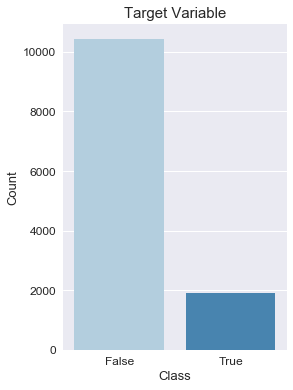

In [73]:
y = df.Revenue
print(y.value_counts())

plt.figure(figsize=(4,6))
sns.countplot(y, palette='Blues')
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Target Variable', size = 15)
plt.xlabel('Class', size = 13)
plt.ylabel('Count', size = 13);

Based on the false to true ratio of our target, we'll need to conduct some rebalancing on the data set. We'll do this in the rebalancing portion of the modeling section below. 

Lastly, let's look at a correlation matrix for our data set to check for multicollinearity among our features:

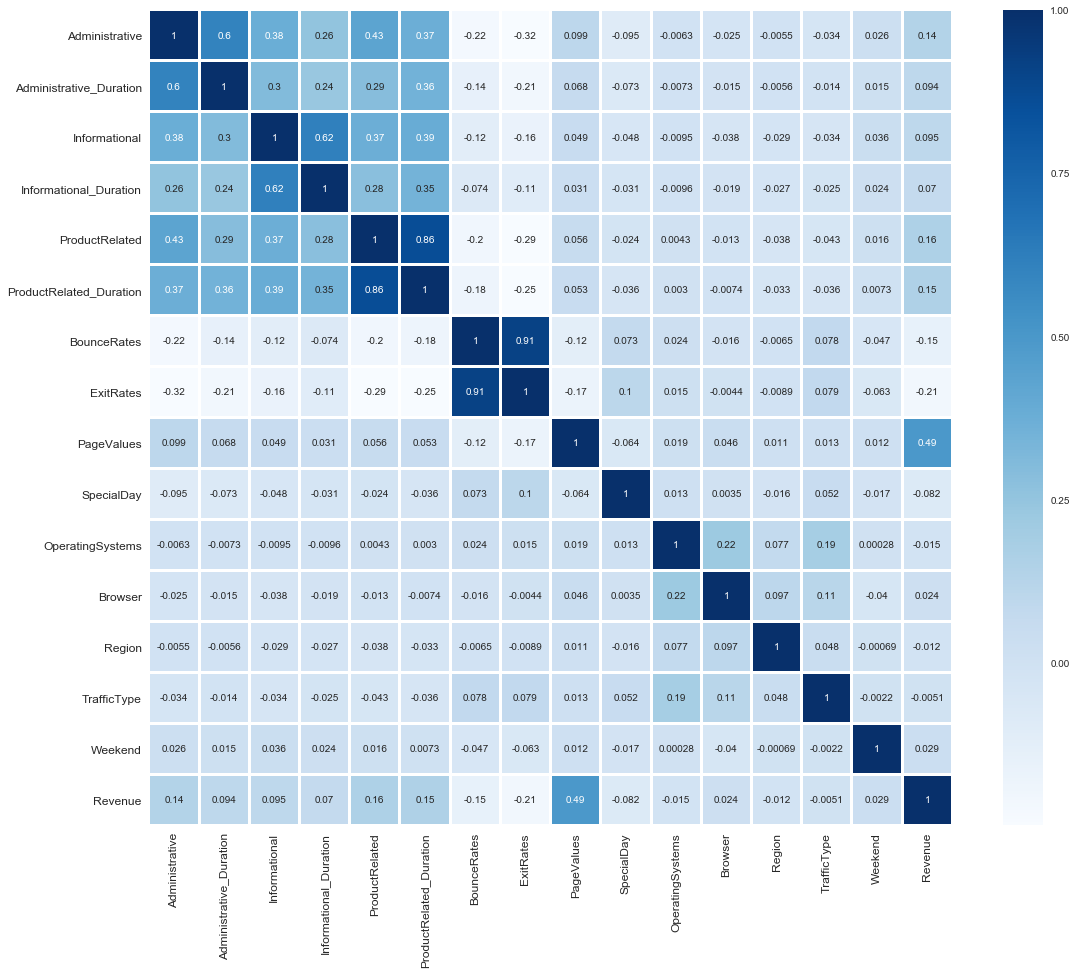

In [74]:
corr = df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr, fmt='.2g', cmap = 'Blues', annot = True, linewidth = 2, robust = True)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

------------------------------------------------------------------------------------------------------------------
## Condition<a id='condition'></a>

[Back to top](#top)

Let's begin the conditioning phase by removing the features that exhibit collinearity above 50%:

In [75]:
df.drop(columns = ['Administrative_Duration', 'Informational_Duration', 
                   'ProductRelated_Duration', 'ExitRates'], inplace = True)
df.head()

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,1,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0,2,0.00,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0,1,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0,2,0.05,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0,10,0.02,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Let's plot the correlation matrix once more to ensure no collinearity above our 50% threshold for our remaining features:

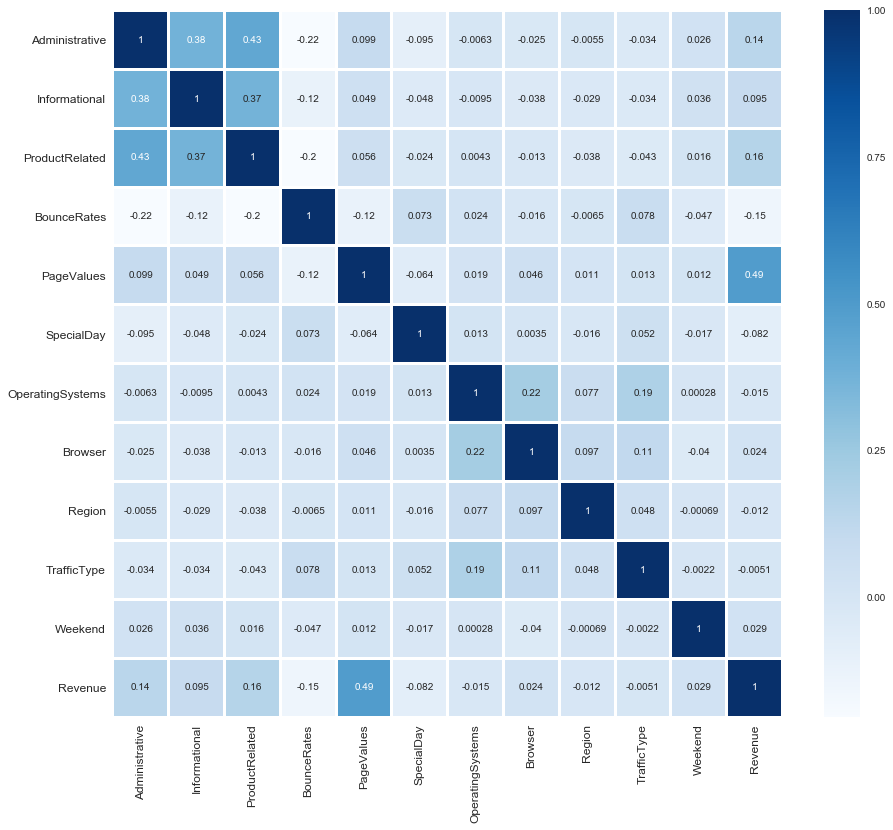

In [76]:
corr = df.corr()
plt.figure(figsize=(15,13))
sns.heatmap(corr, fmt='.2g', cmap = 'Blues', annot = True, linewidth = 2, robust = True)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

Next we'll separate out the target from the feature variables:

In [77]:
feats = df.drop(columns = 'Revenue')
target = df.Revenue

We'll convert the the data type for the 'Weekend' feature from a boolean data type to an integer:

In [78]:
feats['Weekend'] = feats.Weekend.astype(int)
feats.Weekend.head()

0    0
1    0
2    0
3    0
4    1
Name: Weekend, dtype: int64

Now we'll dummify the categorical features so we can run the data through our model:

In [79]:
feats = pd.get_dummies(feats)
feats.head()

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0.20,0.0,0.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,2,0.00,0.0,0.0,2,2,1,2,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0.20,0.0,0.0,4,1,9,3,...,0,0,0,0,0,0,0,0,0,1
3,0,0,2,0.05,0.0,0.0,3,2,2,4,...,0,0,0,0,0,0,0,0,0,1
4,0,0,10,0.02,0.0,0.0,3,3,1,4,...,0,0,0,0,0,0,0,0,0,1


Next, we'll normalize the data using the standard scaler package from Sklearn. We'll do this to ensure the features on different scales do not have a outsized impact on our model's results: 

In [80]:
names = feats.columns

scaler = StandardScaler()
scaled_df = scaler.fit_transform(feats)

scaled_feats = pd.DataFrame(scaled_df, columns = names)
feats = scaled_feats
feats.head()

,Administrative,Informational,ProductRelated,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.396478,-0.691003,3.667189,-0.317178,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
1,-0.696993,-0.396478,-0.668518,-0.457683,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,-0.514182,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
2,-0.696993,-0.396478,-0.691003,3.667189,-0.317178,-0.308821,2.058618,-0.790293,2.437081,-0.265735,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
3,-0.696993,-0.396478,-0.668518,0.573535,-0.317178,-0.308821,0.961270,-0.207952,-0.477771,-0.017289,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
4,-0.696993,-0.396478,-0.488636,-0.045196,-0.317178,-0.308821,0.961270,0.374389,-0.894178,-0.017289,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621


Let's take a quick look at our scaled feature variables: 

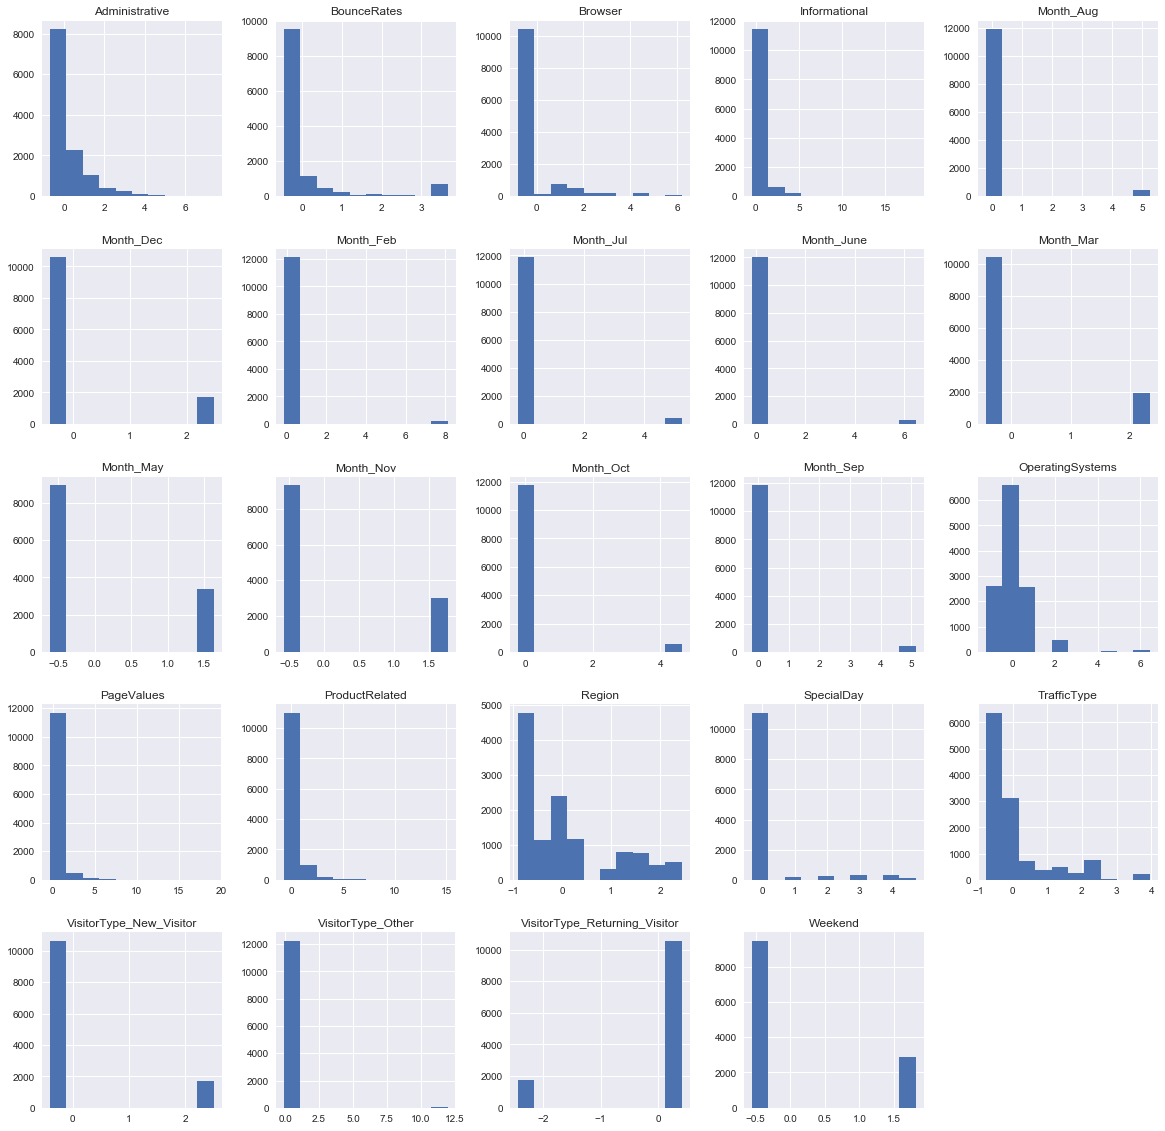

In [81]:
scaled_feats.hist(figsize=(20,20));

Finally, let's convert the data type of our target variable to an integer, 0 will mean false, a customer did not make a purchase during their shopping session, and 1 will mean true, a customer made a purchase:

In [82]:
display(target.dtype)
target = target.astype(int)
display(print(target.value_counts()))
display(target.dtype)

dtype('bool')

0    10422
1     1908
Name: Revenue, dtype: int64


None

dtype('int64')

------------------------------------------------------------------------------------------------------------------
## Modeling <a id='model'></a>

[Back to top](#top)

#### Initial Model:

Let's begin the modeling portion of the project by fitting our first model to the current data. We'll use the results of this model as our baseline from which improve the overall model performance by tuning the hyperparameters and feature engineering. We'll start by splitting the data into our training and testing sets:

In [83]:
x_train, x_test, y_train, y_test = train_test_split(feats, target, test_size = .20)

Fit the model:

In [84]:
logreg = LogisticRegression(random_state=11)
model_log = logreg.fit(x_train, y_train)
model_log

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=11, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Now that we have our baseline model, let's see how it performs on our training set: 

In [85]:
y_hat_train = logreg.predict(x_train)
residuals = np.abs(y_train - y_hat_train)

print('Model Predictions:')
print()
print(pd.Series(residuals).value_counts())
print()
print(pd.Series(residuals).value_counts(normalize=True))
print('-' * 50)
print('Performance Metrics:')
print()
print('Recall: {}'.format(recall_score(y_train, y_hat_train)))
print('Precision: {}'.format(precision_score(y_train, y_hat_train))) 
print('Accuracy: {}'.format(accuracy_score(y_train, y_hat_train)))

Model Predictions:

0    8704
1    1160
Name: Revenue, dtype: int64

0    0.882401
1    0.117599
Name: Revenue, dtype: float64
--------------------------------------------------
Performance Metrics:

Recall: 0.3659658344283837
Precision: 0.7406914893617021
Accuracy: 0.8824006488240065


The model performed decently well on the training set with a 88% accuracry score. Let's see how it performs on the testing set: 

In [86]:
y_hat_test = logreg.predict(x_test)
residuals = np.abs(y_test - y_hat_test)

print('Model Predictions:')
print()
print(pd.Series(residuals).value_counts())
print()
print(pd.Series(residuals).value_counts(normalize=True))
print('-'* 50)
print('Performance Metrics:')
print()
print('Recall: {}'.format(recall_score(y_test, y_hat_test)))
print('Precision: {}'.format(precision_score(y_test, y_hat_test))) 
print('Accuracy: {}'.format(accuracy_score(y_test, y_hat_test)))

Model Predictions:

0    2201
1     265
Name: Revenue, dtype: int64

0    0.892539
1    0.107461
Name: Revenue, dtype: float64
--------------------------------------------------
Performance Metrics:

Recall: 0.40932642487046633
Precision: 0.8102564102564103
Accuracy: 0.8925385239253852


Again, not bad. The model returned about the same accuracy score as with the training set. The precision score dropped slightly but some variation here is to be expected. Because the training and testing scores are relatively aligned, we can be confident the model is not over fitted. 

Let's further analyze the test set results by visualizing the confusion matrix on the test set using seaborn: 

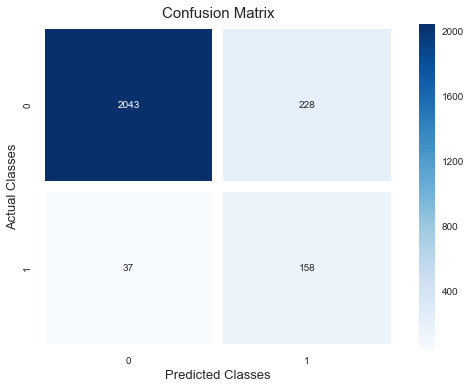

In [87]:
cnf_matrix = confusion_matrix(y_hat_test, y_test)

plt.figure(figsize=(8,6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap= 'Blues', linewidths=10, )
plt.title('Confusion Matrix', size= 15)
plt.xlabel('Predicted Classes', size = 13)
plt.ylabel('Actual Classes', size = 13);

*** Let's also visualize the ROC curve and AUC for our initial model for both the train and test set to inspect the overlap in predictions from our model: 

Initial Model Test AUC: 0.8974666201673973
Initial Model Train AUC: 0.8973818739680246


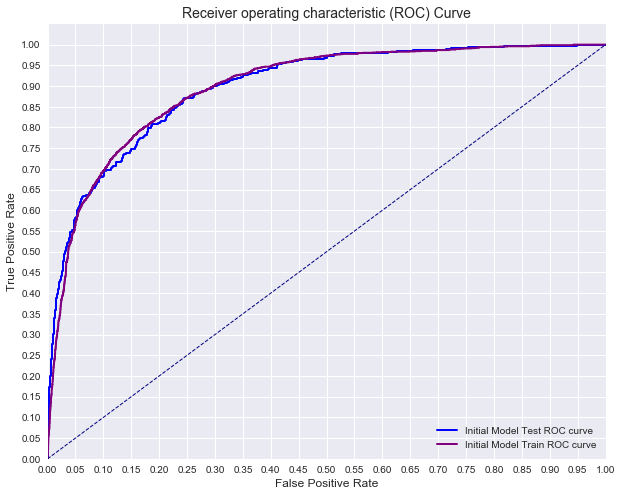

In [88]:
y_test_score = logreg.decision_function(x_test)
y_train_score = logreg.decision_function(x_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Initial Model Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Initial Model Train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(10,8))
plt.plot(test_fpr, test_tpr, color = 'blue', lw = 2, label ='Initial Model Test ROC curve')
plt.plot(train_fpr, train_tpr, color = 'purple', lw = 2, label ='Initial Model Train ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])

plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)
plt.title('Receiver operating characteristic (ROC) Curve', size = 14)
plt.legend(loc="lower right");

#### Notes on Initial Model Results: 

- **Accuracy**
    - The test and train set returned similar a similar accuracy score indicating no over fitting on the initial model. 
    - The accuracy scores were in the high 80%'s for both the train and test set which is a relatively decent first model. However, the highly imbalanced nature of the data set may be influencing the performance metrics, particularly with respect to making positive predictions.  
- **Precision**
    - Our precision score for both the train and test set were relatively good with with a score of 73% and 75% respectively.
- **Recall**
    - Our recall scores are poor, however given the business case, we're not going to focus on these scores as precision is the result for which we hope to optimize.
- **AUC, Threshold**
    - With an AUC of roughly 90 percent, we can be confident our model is making the correct prediction 90 percent of the time. These scores are pretty good. 


------------------------------------------------------------------------------------------------------------------
#### Rebalancing:

During the EDA phase, we saw how our target feature was imbalanced. These imbalances can give us false confidence in some of our model evaluation metrics. To solve for this, we'll rebalance the data set using the SMOTE method: 

In [89]:
x = feats
y = target

print(y.value_counts())
x_resampled, y_resampled = SMOTE().fit_sample(x,y)
print(pd.Series(y_resampled).value_counts())

scaled_feats = pd.DataFrame(x_resampled, columns = feats.columns)
scaled_target = y_resampled

0    10422
1     1908
Name: Revenue, dtype: int64
1    10422
0    10422
dtype: int64


------------------------------------------------------------------------------------------------------------------

#### Feature Engineering:

To begin the feature engineering process, let's run the Recursive Feature Elimination method using Crossfold Validation as our scoring metric to identify the suggested number of features to include in our final model:

Optimal number of features: 1


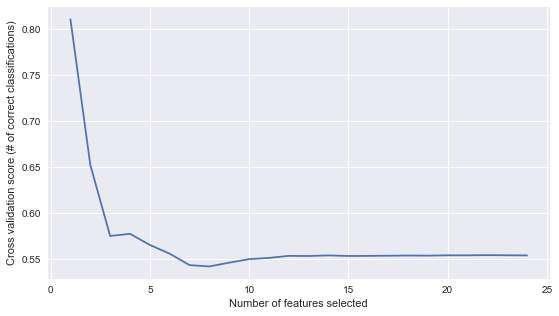

In [90]:
rfecv = RFECV(estimator=logreg, step=1, cv=StratifiedKFold(3), scoring='accuracy')
rfecv.fit(scaled_feats, scaled_target)

print("Optimal number of features: {}".format(rfecv.n_features_))

plt.figure(figsize=(9,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (# of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Based on our RFE analysis, it appears that choosing only one feature optimizes our Cross Validation Score. Thus, we will run another model with one feature, as well as another model with the top three most significant features based upon their coefficients and correlation with the target. 

Let's visualize our feature importances based on their coefficients to identify the most impactful feature:

In [91]:
coefs = model_log.coef_.T
print(coefs)

[[ 0.03626239]
 [ 0.06501886]
 [ 0.20395098]
 [-0.847258  ]
 [ 1.51148824]
 [-0.04082857]
 [-0.09071755]
 [ 0.08863151]
 [-0.02104844]
 [-0.03233444]
 [ 0.06550208]
 [ 0.05220114]
 [-0.13567732]
 [-0.17477173]
 [ 0.0472629 ]
 [-0.0376107 ]
 [-0.09106383]
 [-0.15237148]
 [ 0.32304719]
 [ 0.03397341]
 [ 0.05806593]
 [ 0.07154088]
 [-0.02495494]
 [-0.06421511]]


In [92]:
columns = pd.Series(feats.columns)
print(columns)

0                    Administrative
1                     Informational
2                    ProductRelated
3                       BounceRates
4                        PageValues
5                        SpecialDay
6                  OperatingSystems
7                           Browser
8                            Region
9                       TrafficType
10                          Weekend
11                        Month_Aug
12                        Month_Dec
13                        Month_Feb
14                        Month_Jul
15                       Month_June
16                        Month_Mar
17                        Month_May
18                        Month_Nov
19                        Month_Oct
20                        Month_Sep
21          VisitorType_New_Visitor
22                VisitorType_Other
23    VisitorType_Returning_Visitor
dtype: object


We'll visualize the feature coefficients to isolate the most significant features for use on our final model:

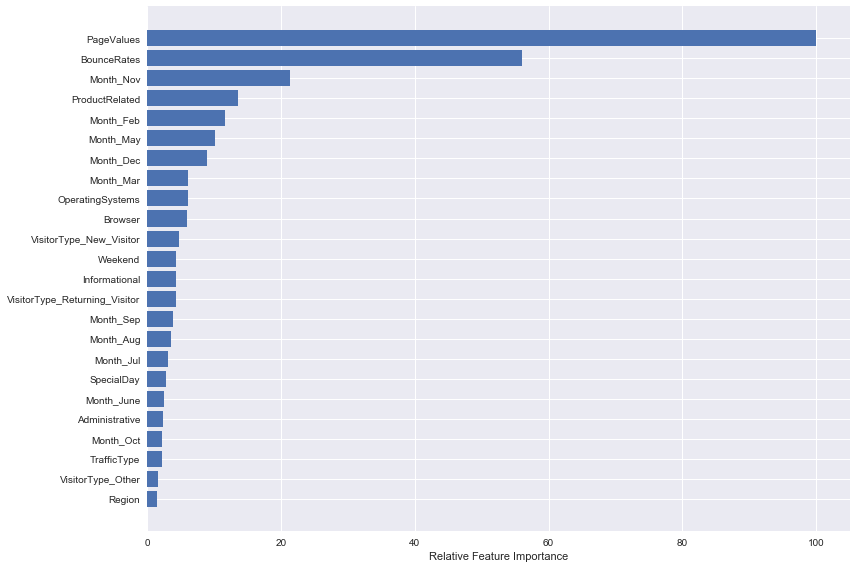

In [93]:
feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(12,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(feats.columns)[sorted_idx], fontsize=10)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

Based on our feature importances as determined by their coefficients, and our RFECV analysis using Cross Validation which suggests using one feature, we'll run additional models using just one feature, 'PageValues', and at least one other model using a few of the more significant features.

------------------------------------------------------------------------------------------------------------------
#### Hyperparameter Tuning:

Now that we have solved for collinearity, baseline model fitted, the data has been normalized and rebalanced, and the most significant features identified, it's time to run the grid search to identify some suggested hyperparamaters for the remaining model iterations. We'll run our grid search using GridsearchCV package available with sklearn:

In [94]:
x_train, x_test, y_train, y_test = train_test_split(scaled_feats, scaled_target, test_size = .20)

grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'fit_intercept':['True', 'False'], 
        'class_weight': ['balanced', None]}

logreg = LogisticRegression(random_state=15)
logreg_cv = GridSearchCV(logreg,grid,cv=3)
logreg_cv.fit(x_train, y_train)

print("Tuned Hyperparameters: ",logreg_cv.best_params_)
print("Accuracy: ",logreg_cv.best_score_)

Tuned Hyperparameters:  {'C': 0.01, 'class_weight': None, 'fit_intercept': 'True', 'penalty': 'l1'}
Accuracy:  0.8356821589205398


 ------------------------------------------------------------------------------------------------------------------

#### Cost Benefit: Financial Implications

Before moving on with further model iterations, we'll take a step back and assess the financial implications for our logistic regression predictions with respect to the use case at Amazon Inc. Each model prediction will have an impact on Amazon's revenue. Let's break down the financial impact of these predictions:

- *True Negative:* **Cost** = ~125 dollars
    - Amazon will lose out on 125 dollars of revenue if a shopper does not make a purchase and is not offered the 10 percent discount.
- *False Positive:* **Cost** = ~137.5 dollars
    - Amazon will lose ~112.5 dollars in lost revenue if our model predicts a shopper will transact, but instead they do not. In this case, the model will instruct the website not to offer a 10 percent discount, thus lost opportunity to entice revenue from a potential sale is: 125 - discount of 12.5 = -112.5 dollars
    - Further, we'll factor in an additional revenue penalty that accounts for the portion of first time shoppers that do not transact. In this scenario, first time shoppers will not experience the seamless experience of shopping at Amazon and will be less likely to be repeat shoppers. This additional revenue penalty will equal 25 dollars in lost potential future revenue.
- *False Negative:* **Benefit** = ~112.5 dollars
    - Amazon will earn ~112.5 dollars in revenue if the model predicts a shopper will not transact, thus a 10 percent discount is offered, and the shopper makes the purchase: 125 - 12.5 percent discount = 112.5 dollars. 
- *True Positive:* **Benefit** = 200 dollars
     - Amazon will earn 125 dollars in revenue if our model correctly predicts a shoppers propensity to transact, thus no offer is made.
     - Further, additional revenue has been added to account for repeat shoppers. Visitors who experience shopping at Amazon are inclined to be repeat shoppers. Thus, additional revenue benefit of 75 dollars has been factored in.
     
*Key Assumptions:*
- *Figures are based on one shopping session*
- *Avg. shopping session purchase = ~125 dollars*
- *Avg. discount to entice shoppers to transact = ~10 percent*


**Target Metric: Precision**
- Based upon the financial impact analysis above, it's important going forward to build a model that limits Type I errors. Thus, we want a model that reflects high precision which limits the costs associated with false positive predictions. 

With these figures in mind, let's assign the appropriate cost/benefit revenue figures for each of the predictions our ensuing model iterations will produce:

In [95]:
TN = -125
FP = -137.5
FN = 112.5
TP = 200

------------------------------------------------------------------------------------------------------------------

#### Model Iterations:

Now that have our suggested hyperparameters, let's iterate on a number of models to find the best parameters and features for optimizing precision.

We'll start here by defining a function that takes in the logreg variable with the desired parameters and returns the needed cost/benefit figures along with the precision score and confusion matrix. We'll use this function for our model iterations

In [96]:
def model(logreg):
    model_log = logreg.fit(x_train, y_train)

    y_hat_test = logreg.predict(x_test)
    y_hat_train = logreg.predict(x_train)
    
    print('Precision: {}'.format(precision_score(y_test, y_hat_test))) 
    
    cnf_matrix = confusion_matrix(y_test, y_hat_test)
   
    tn_cost = ((cnf_matrix[0][0] / len(y_test)) * TN)
    fp_cost = ((cnf_matrix[0][1]/len(y_test)) * FP)
    fn_ben = ((cnf_matrix[1][0]/len(y_test)) * FN)
    tp_ben = ((cnf_matrix[1][1]/len(y_test)) * TP)
    
    print()
    print('Cost/Benefit = {} Dollars Per Shopping Session'.format((tn_cost+fp_cost+fn_ben+tp_ben).round(2)))
    print()
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap= 'Blues', linewidths=10 )
    plt.title('Confusion Matrix', size= 15)
    plt.xlabel('Predicted Classes', size = 13)
    plt.ylabel('Actual Classes', size = 13);
    

Next, we'll remove all features from the scaled_feats data set beside 'PageValues','Administrative', 'ProductRelated', 'BounceRates' for running the next iteration of models:

In [97]:
scaled_feats = scaled_feats[['PageValues', 'Administrative', 'ProductRelated', 'BounceRates']]

We'll split a new training and testing set with the remaining features and our target:

In [98]:
x_train, x_test, y_train, y_test = train_test_split(scaled_feats, scaled_target, test_size = .20)

***Model 1***
- Suggested hyperparameters from grid search
- Four features deemed significant based on high coefficients and correlation with the target variable

Let's instantiate the Logistic Regression method with the appropriate parameters:

In [99]:
logreg = LogisticRegression(penalty = 'l1', class_weight = 'balanced', fit_intercept = True, C = .001)

And run our first model:

Precision: 0.8763383297644539

Cost/Benefit = 26.99 Dollars Per Shopping Session



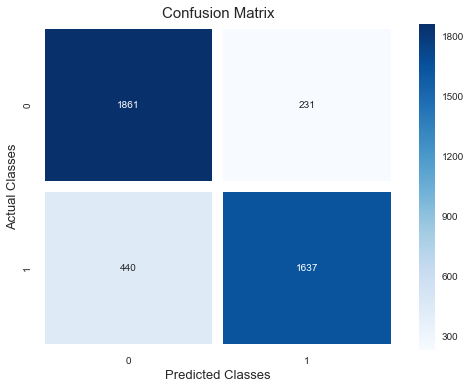

In [100]:
model(logreg)

***Model 2***
- Hyperparameters we've chosen ourselves
- Four features deemed significant based on high coefficients and correlation with the target variable

In [101]:
logreg = LogisticRegression(penalty = 'l2', fit_intercept = True, C = .001, max_iter = 100, tol = 0.0001)

Precision: 0.8586897671900379

Cost/Benefit = 25.83 Dollars Per Shopping Session



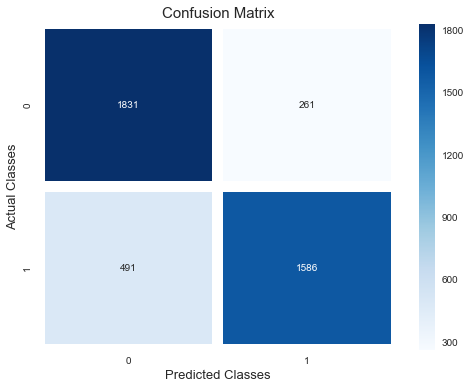

In [102]:
model(logreg)

***Model 3***
- Hyperparameters suggested by the grid search
- One feature suggested by the RFECV function and coefficients

We'll start here by removing all features beside 'PageValues' for running the last models:

In [103]:
scaled_feats = scaled_feats[['PageValues']]

In [104]:
x_train, x_test, y_train, y_test = train_test_split(scaled_feats, scaled_target, test_size = .20)

Instantiate a new Logistic Regression method with differing parameters and assign it to logreg variable:

In [105]:
logreg = LogisticRegression(penalty = 'l1', class_weight = 'balanced', fit_intercept = True, C = .001)

Precision: 0.910271546635183

Cost/Benefit = 26.71 Dollars Per Shopping Session



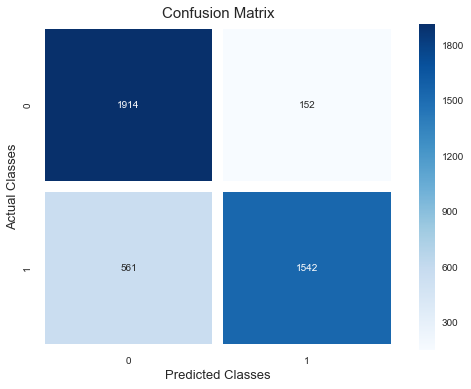

In [106]:
model(logreg)

***Model 4***
- Hyperparameters we've chosen ourselves
- One feature suggested by the RFECV function and coefficients

In [107]:
logreg = LogisticRegression(penalty = 'l2', fit_intercept = True, C = .001, max_iter = 100, tol = 0.0001)

Precision: 0.9274084124830394

Cost/Benefit = 23.17 Dollars Per Shopping Session



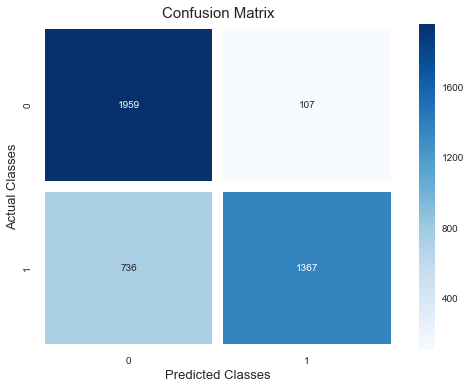

In [108]:
model(logreg)

------------------------------------------------------------------------------------------------------------------

#### Final Model

All of the models above perform decently well with respect to their precision scores. Notably, this is an improvement of roughly 15-18 percent above our baseline model. 

**Cost/Benefit:**

- Model 3 returned the 2nd best revenue benefit of all four iterations. 

**Precision**

- Model 3 also returned the 2nd best precision score with the 2nd least number of Type I errors. 

**Conclusion:** 

- Based on the consistency of model 3 in terms of performance, we'll choose this model for implementation within Amazon's website. The other 3 models performed well in one area or another, but none were as consistant as Model 3.  

------------------------------------------------------------------------------------------------------------------

## Cost Benefit Analysis Result <a id='costbenefitanalysis'></a>

[Back to top](#top)

With a net benefit of ~26.71 dollars per average shopping session, the implementation of Model 3 would yield a total revenue benefit of 320,520 dollars over the next 12,000 shopping sessions.

------------------------------------------------------------------------------------------------------------------
## Conclusion <a id='conclusion'></a>

[Back to top](#top)

We've optimized the parameters and data to limit Type I errors and thus increasing the precision of our model and net revenue benefit.

**Question:** Given our analysis and logistic regression classifier, would the implementation of a classifier be advantageous with respect to revenue optimization? 

**Answer:** Yes. With the implementation of our model, Amazon can expect to see 320,520 dollars of additional revenue per the next 12,000 shopping sessions.

------------------------------------------------------------------------------------------------------------------
## Recommendations <a id='recommendation'></a>

[Back to top](#top)

In order to satisfy our quest to boost conversion rates of online shoppers, we need to ensure the business assumptions within the cost/benefit analysis accurately reflect reality. Thus, further business analysis should be done to 

Further, much work is needed to flush out the implementation of our model with Amazon's software developers. Careful consideration is needed with respect to user experience as discount offers are provided to shoppers in an effort to entice transactions. Visitors must not feel spied upon when offers are given to entice a purchase. Implementing a respectful experience is a key component to fulfilling the conversion and revenue objectives.

------------------------------------------------------------------------------------------------------------------
## Future Work <a id='futurework'></a>

[Back to top](#top)

Recommendations for future work: 

- Extract further user data from shopping sessions to further improve our model's overall predictive power. Additional suggesed dimensions:
    - Visitor location based on IP address
    - Visitor zipcodes
    - Visitor purchase history, i.e., has this user made purchases in the past X number of days, weeks, months
    - Visitor login history
    - Visitor age
    
- Iterate through various thresholds by which our model bases it's classifications. Further improvements can be made to optimize our cost/benefit to the business by tweaking our thresholds.

- Run other classification algorithms and compare the results to our existing model. Decision Trees, Random Forests, and Support Vector Machines are a few other classifiers to conider testing. 
    